In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("abhishek14398/salary-dataset-simple-linear-regression")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/salary-dataset-simple-linear-regression


📊 Dataset loaded: 30 rows × 3 columns

📋 Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 852.0 bytes
None

🔍 Missing Values:
Series([], dtype: int64)

🔍 Duplicate Rows:
0

📈 Skewness Check:
YearsExperience    0.37956
Salary             0.35412
Unnamed: 0         0.00000
dtype: float64

📌 Recommendation:
✅ YearsExperience is fairly symmetric (skew=0.38). No action needed.
✅ Salary is fairly symmetric (skew=0.35). No action needed.
✅ Unnamed: 0 is fairly symmetric (skew=0.00). No action needed.

📦 Outlier Check (IQR Method):
✅ Unnamed: 0: No significant outliers.
✅ YearsExperience: No significant outliers.
✅ Salary: No significant outliers.

🔗 Correlation

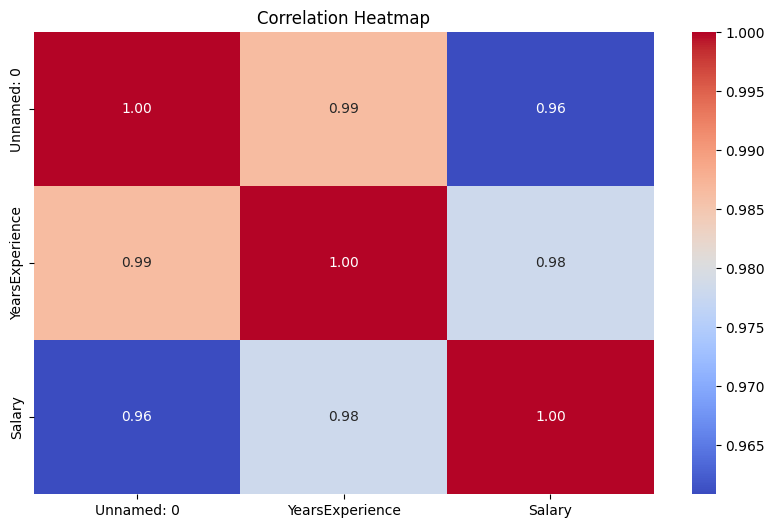

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ====== 1. Load Data ======
df = pd.read_csv("/kaggle/input/salary-dataset-simple-linear-regression/Salary_dataset.csv")  # Ganti dengan nama file kamu
print(f"📊 Dataset loaded: {df.shape[0]} rows × {df.shape[1]} columns")

# ====== 2. Basic Info ======
print("\n📋 Basic Info:")
print(df.info())

# ====== 3. Missing Values & Duplicate Rows Check ======
print("\n🔍 Missing Values:")
missing = df.isnull().sum()
print(missing[missing > 0])

print("\n🔍 Duplicate Rows:")
duplicate = df.duplicated().sum()
print(duplicate)

# ====== 4. Skewness Check ======
print("\n📈 Skewness Check:")
skewed_features = df.select_dtypes(include=['number']).apply(lambda x: x.skew()).sort_values(ascending=False)
print(skewed_features)

print("\n📌 Recommendation:")
for col, skew in skewed_features.items():
    if abs(skew) > 1:
        print(f"⚠️ {col} is highly skewed (skew={skew:.2f}). Suggest: Apply log or sqrt transform.")
    elif abs(skew) > 0.5:
        print(f"ℹ️ {col} is moderately skewed (skew={skew:.2f}). Transform optional.")
    else:
        print(f"✅ {col} is fairly symmetric (skew={skew:.2f}). No action needed.")

# ====== 5. Outlier Detection (IQR Method) ======
print("\n📦 Outlier Check (IQR Method):")
for col in df.select_dtypes(include=['number']):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outlier_count = ((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))).sum()
    if outlier_count > 0:
        print(f"⚠️ {col}: {outlier_count} outliers detected.")
    else:
        print(f"✅ {col}: No significant outliers.")

# ====== 6. Correlation Analysis ======
print("\n🔗 Correlation Matrix (Top correlated pairs):")
correlation = df.corr(numeric_only=True)
cor_matrix = correlation.abs().unstack().sort_values(ascending=False).drop_duplicates()
top_corr = cor_matrix[(cor_matrix < 1) & (cor_matrix > 0.7)]
print(top_corr)

print("\n📌 Recommendation:")
for (f1, f2), corr_val in top_corr.items():
    print(f"⚠️ {f1} & {f2} have high correlation ({corr_val:.2f}). Suggest: Keep only one or apply dimensionality reduction (e.g., PCA).")

# ====== 7. Heatmap ======
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [6]:
# Menghapus kolom 'Unnamed: 0'
df = df.drop(columns=['Unnamed: 0'])

# Memisahkan fitur (X) dan target (y)
X = df[['YearsExperience']]  # Fitur (kolom YearsExperience)
y = df['Salary']  # Target (kolom Salary)

In [7]:
# Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [8]:
# Training model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [9]:
# Prediksi
y_pred = model.predict(X_test)

In [10]:
# Evaluasi
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

MAE: 6286.453830757745
MSE: 49830096.855908394
R2 Score: 0.9024461774180497


In [11]:
# Menampilkan koefisien dan intercept
print(f"Koefisien: {model.coef_}")
print(f"Intercept: {model.intercept_}")

Koefisien: [9423.81532303]
Intercept: 24380.201479473704


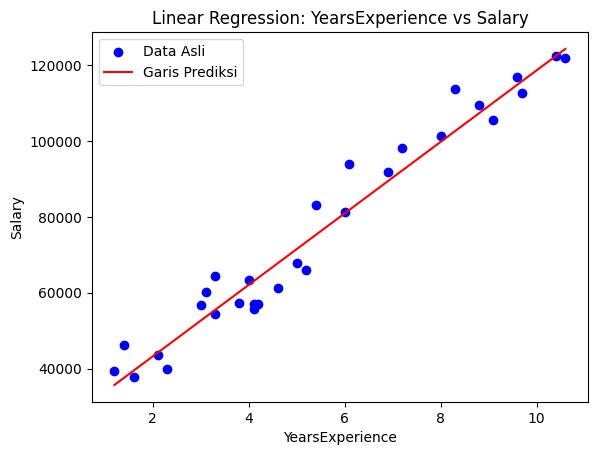

In [12]:
# Plot hasil regresi
plt.scatter(X, y, color='blue', label='Data Asli')
plt.plot(X, model.predict(X), color='red', label='Garis Prediksi')
plt.title('Linear Regression: YearsExperience vs Salary')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.legend()
plt.show()